<a href="https://colab.research.google.com/github/Brylimo/go-game-ranking-prediction-machine/blob/master/prediction_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
from google.colab import drive

#load train data and label
drive.mount('/content/drive')
train_data_path = "/content/drive/Shareddrives/기계학습5조/colab_data/baduk/train_data.npy" # Your train data file
train_label_path = "/content/drive/Shareddrives/기계학습5조/colab_data/baduk/train_label.npy" # Your train label file

train_data = np.load(train_data_path, allow_pickle=True)
train_label_rawdata = np.load(train_label_path, allow_pickle=True)  

num_train_data = len(train_data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
print(train_data.shape) # train_data is a list

(2682,)


In [75]:
#check data shape
print(len(train_data[0]))
print(train_data[0][0].shape)

265
(1, 19, 19)


In [76]:
print(len(train_data[1]))
print(train_data[1][0].shape)

245
(1, 19, 19)


In [77]:
print(len(train_data[2]))
print(train_data[2][0].shape)

246
(1, 19, 19)


In [78]:
# Get last baduk data of first game (바둑경기 전체 수순에서 마지막 바둑판의 장면)
teamp_last_data = train_data[0][-1]
print(teamp_last_data) # 1 denotes a black stone. -1 denotes a white stone. 0 denotes an empty position.

[[[ 0  0  0 -1  0  1  0  0  0  0  0  0 -1 -1 -1  1  1  0  1]
  [ 0 -1 -1  0 -1  1 -1  1 -1 -1  0 -1  0 -1  0 -1  1  1  0]
  [-1  0 -1 -1  1  0  1  1 -1  1 -1 -1 -1  0  0 -1  1 -1  1]
  [ 0 -1  1  1  1  1  0  0 -1  1  1  1 -1 -1 -1  1  1 -1 -1]
  [ 0  1  1  0  0  0  0  1 -1 -1  1  1  1  1  1  1 -1 -1  0]
  [ 0  0  0  0  0  0  0  1  1 -1 -1  1  1 -1  1  1 -1 -1 -1]
  [ 0  0  0  0  0  1  1 -1 -1  1 -1 -1 -1 -1  1  1  1 -1  0]
  [ 0  0  0  0  0  1 -1  0 -1  0  1  1  0 -1 -1  1 -1  0 -1]
  [ 0  0  1 -1 -1  1 -1  1 -1  1  0  1 -1  0  1 -1 -1  0  0]
  [ 0  1  1  1  1 -1  0 -1  0 -1  1 -1  0 -1 -1 -1  0 -1 -1]
  [ 0  0  1 -1 -1 -1 -1 -1 -1  0  1  0 -1  0  0  1 -1 -1  0]
  [ 0  1  1  0  0  0 -1  0 -1  1  0  1  1  0  0  0  1 -1  0]
  [ 0 -1  1 -1 -1 -1  1 -1  0  0  1  0  0  1  1  0  1 -1  0]
  [ 0  0 -1  1  1  1  1  1  1  1  0  0 -1 -1  1  0  1  1 -1]
  [-1 -1  0 -1  1  0  0  0 -1  1  0  0 -1  0 -1  1  1 -1  0]
  [-1  1 -1 -1 -1 -1  0 -1  0 -1  1  0 -1  0 -1 -1 -1 -1 -1]
  [ 1  0  1  1  1 -1  0 

In [79]:
# Get last baduk data of all game
last_train_data = np.zeros( (num_train_data, 19,19) )

for i in range(num_train_data):
  temp_last_data = train_data[i][-1]
  last_train_data[i, :, :] = temp_last_data

In [80]:
# Print last_train_data shape and contents
print(last_train_data.shape) # shape
print(last_train_data[50]) # content of 50-th games

(2682, 19, 19)
[[-1.  0. -1. -1.  0. -1.  0. -1.  0. -1.  0. -1. -1. -1. -1.  1.  0.  1.
   0.]
 [-1.  0. -1.  0. -1. -1.  0. -1. -1. -1.  0. -1.  0. -1. -1.  1.  1.  1.
   1.]
 [ 0. -1.  0. -1. -1. -1. -1.  0. -1. -1. -1.  0.  0. -1. -1.  1.  0.  1.
   1.]
 [-1.  0. -1. -1.  0.  0. -1. -1.  0. -1. -1.  0. -1. -1. -1.  1.  1.  1.
   1.]
 [-1. -1.  0. -1. -1. -1.  0. -1. -1. -1.  0. -1.  0. -1. -1. -1. -1.  1.
  -1.]
 [ 0.  0. -1.  0. -1.  0. -1. -1. -1. -1. -1.  0.  0. -1. -1.  0. -1. -1.
  -1.]
 [-1. -1. -1. -1. -1. -1. -1.  0. -1.  0. -1. -1. -1. -1.  0. -1.  1.  1.
  -1.]
 [ 0. -1.  0. -1.  0. -1.  0. -1.  0. -1.  1.  1. -1.  0. -1.  1.  0.  1.
   1.]
 [-1.  0. -1.  0. -1. -1. -1. -1. -1.  1.  0.  1. -1. -1.  1.  0.  1.  0.
   1.]
 [ 0. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  0.  1.  0.  1.
   1.]
 [-1. -1.  0. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
   0.]
 [ 0. -1.  0. -1.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.  0.  1.  0.  1.
   1.]
 [-1. -1. -1.

In [81]:
# Prepare data for training SVM
last_train_data = np.reshape(last_train_data,(num_train_data, 19*19))
print(last_train_data.shape) # check shape of last_train_data

(2682, 361)


In [82]:
# Prepare label for training SVM
rating = ['18k', '17k', '16k', '15k', '14k', '13k', '12k', '11k', '10k', 
          '9k', '8k', '7k', '6k', '5k', '4k', '3k', '2k', '1k',
          '1d', '2d', '3d', '4d', '5d', '6d', '7d', '8d', '9d']

In [83]:
# Prepare label for training SVM (character rating to integer rating)
train_label = np.zeros(num_train_data)
for i in range(num_train_data):
  train_label_temp = train_label_rawdata[i]
  train_label_idx = rating.index(train_label_temp)
  train_label[i] = train_label_idx

In [84]:
print(sum(train_label==0)) # number of '18k' 
print(sum(train_label==26)) # number of '9d'

99
100


## Support Vector Machine

In [85]:
# Train SVM using training data and label (This part shoud be done by ML algorithm!) --> Key part! (학생 여러분들은 여기에 머신러닝 알고리즘을 구현하면 됩니다. 가장 중요한 부분입니다.)
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(last_train_data, train_label)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [86]:
# Get test data
test_data_path = "/content/drive/Shareddrives/기계학습5조/colab_data/baduk/test_data.npy"
test_data = np.load(test_data_path, allow_pickle=True)

In [87]:
# Get last test data
num_test_data = len(test_data)

last_test_data = np.zeros( (num_test_data, 19, 19) )

for i in range(num_test_data):
  temp_last_data = test_data[i][-1]
  last_test_data[i, :, :] = temp_last_data

last_test_data = np.reshape(last_test_data, (num_test_data, 19*19))

In [88]:
# Predict test labels
pred_test_label = clf.predict(last_test_data)

In [89]:
# Get test labels (student does not have this ground-truth of test data)
test_label_path = "/content/drive/Shareddrives/기계학습5조/colab_data/baduk/test_label2.npy"
test_label_rawdata = np.load(test_label_path, allow_pickle=True)
test_label = np.zeros(num_test_data)
for i in range(num_test_data):
  test_label_temp = test_label_rawdata[i]
  test_label_idx = rating.index(test_label_temp)
  test_label[i] = test_label_idx

In [90]:
# Accuracy on test data with SVM (baseline accuracy is 1/26=0.384)
print('Accuracy on test data: ' + str(sum(pred_test_label==test_label)/len(test_label)))

Accuracy on test data: 0.046468401486988845


## XGBoost

In [91]:
import xgboost

print(xgboost.__version__)

0.90


In [98]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.05)
xgb_clf.fit(last_train_data, train_label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [93]:
pred_test_label_xgb = xgb_clf.predict(last_test_data)

In [94]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_label, pred_test_label_xgb)
print('정확도: {0}'.format(accuracy))

정확도: 0.06171003717472119


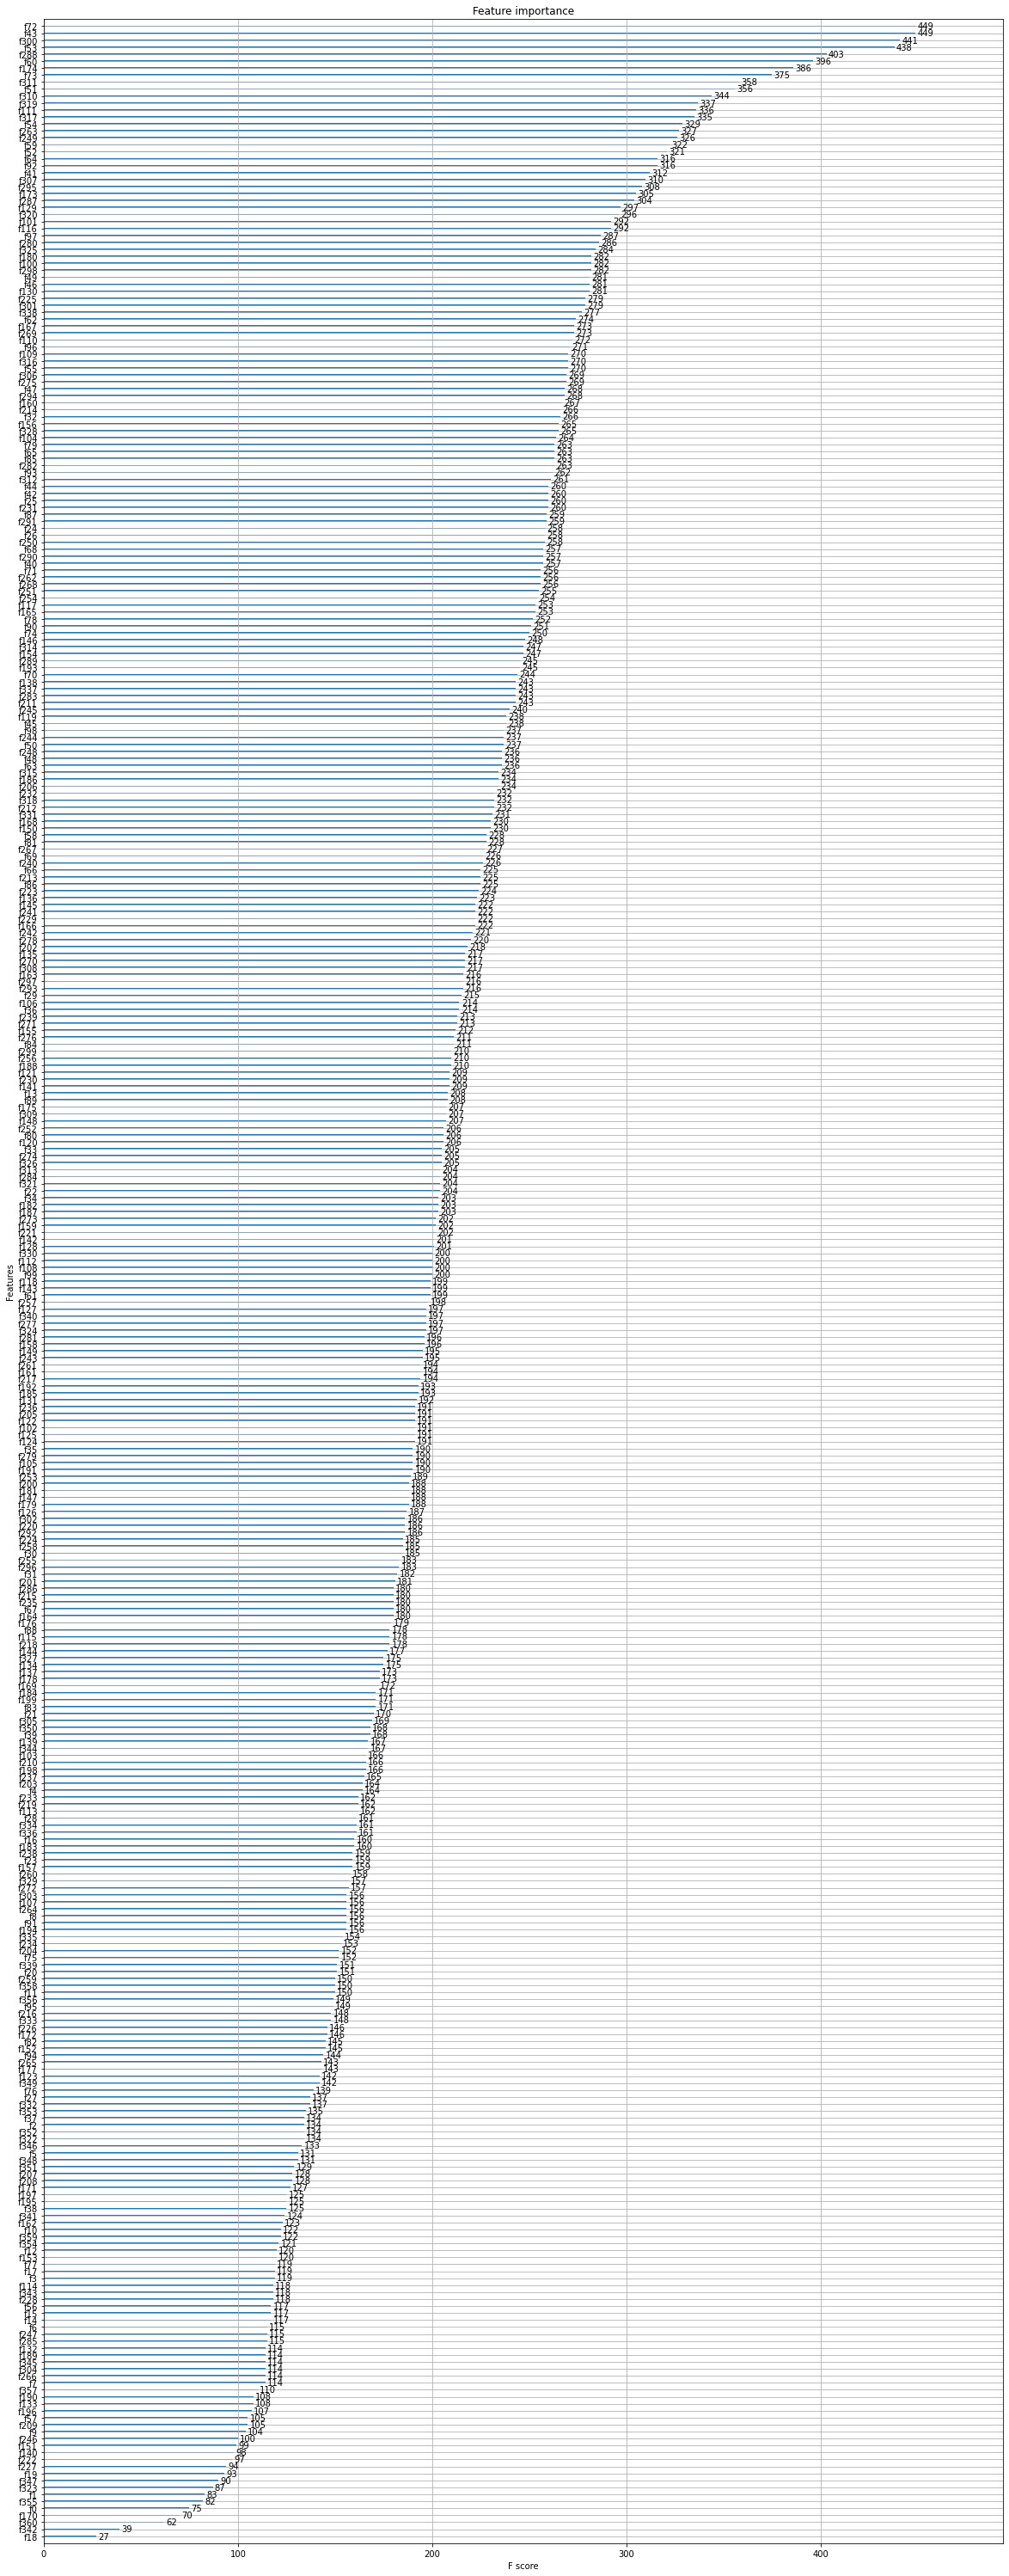

In [95]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 54))
plot_importance(xgb_clf, ax=ax)

## Foolish Support Vector Machine

In [96]:
# Train foolish SVM 
import random
from sklearn.svm import LinearSVC

train_label_foo = train_label
random.shuffle(train_label_foo) # shuffle ground-truth labels!

clf_foo = LinearSVC()
clf_foo.fit(last_train_data, train_label_foo)
pred_test_label_foo = clf_foo.predict(last_test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [97]:
# Accuracy on test data with foolish SVM (baseline accuracy is 1/26=0.384)
print('Accuracy on test data: ' + str(sum(pred_test_label_foo==test_label)/len(test_label)))

Accuracy on test data: 0.03717472118959108


# 새 섹션